**[<font size=6>Jakarta travel time prediction Competition</font>](https://contest.yandex.com/contest/74775)** [**rules**](https://disk.yandex.com/d/7xJ8GeGacA5KbA) for task.

<font color=green><h3><b>**Task description**</b><font>

**Predictive Regression Modeling**: predict the duration of a car trip based on the features of a route in Jakarta. The available features include the start and end points, weather conditions, road traffic, and others.


The dataset is divided into the training and test subsets (with no target values for the objects — you need to predict those). Your target variable is the travel time 'travel_time', a numerical feature. You need to predict it in the test dataset.






<font color=green><h3><b>Competition's Rules

You can find about rules and evaluation your solution [here](https://disk.yandex.com/d/7xJ8GeGacA5KbA).



<font color=green><h3><b> **Solution format**</b><font>


It is needed to provide two files:
Submission-file to be uploaded to the Yandex Contest system As a solution and Notebook-file to be sent via email by request from the Organiser after the competition ended up.


Notebook-file. This is an IPYNB-file that contains the code for preparing the Submission-file. The preparation code consists of importing and preparing data, training the model, and preparing the file itself with responses for the test sample. This includes predicting the target/responses for the test sample. The notebook-file will be needed to check reproducibility (Rules, clause 6.2.4.).


<font color=green><h3><b>**Preparing the submission file**</b><font>

Use the code from this notebook to prepare your submission file. Make sure that the order of objects in the submission file is the same as in the test dataset, and that there is only not-indexed one column with responses from your model. You’ll find the preparation code below the baseline solution. Click [here](https://www.kaggle.com/code/sgwood/step-1-understanding-the-submission-file). for more information about the submission file.


<font color=green><h3><b>**More about uploading the file and LeaderBoard the Yandex Contest**</b><font>




To send a submission file, open the [competition](https://contest.yandex.com/contest/74775/enter/), go to Problems, select the task "Jakarta Travel Time Prediction", choose a file from your local storage, and submit it by clicking Send File. This is also where you can check how many attempts you have left to solve the competition tasks.


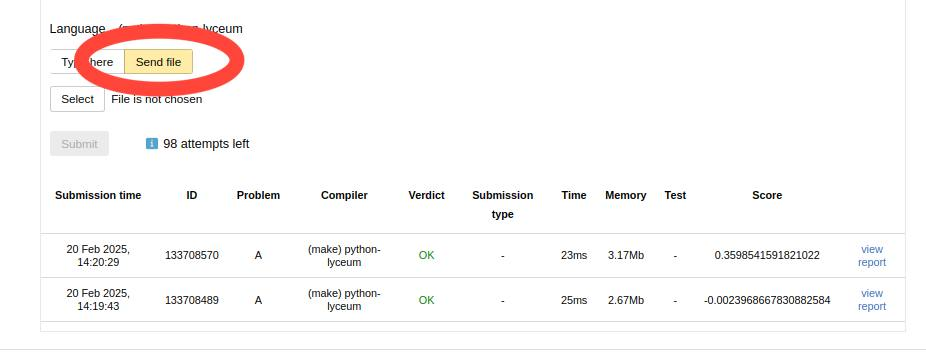



If your submission is prepared correctly (see the instructions above, use the baseline approach), the system returns the "OK" verdict. In addition, the system gives your submission a score based on the $R^2$ value for the test sample.

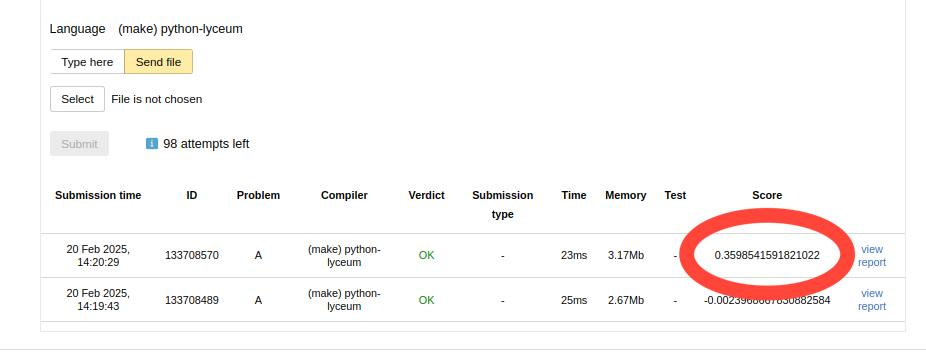

After submission, your score appears on the general leaderboard, visible to both you and other participants. Rankings are based on score, which serves as the main competition metric. The leaderboard displays your highest-scoring submission. The score shown in the leaderboard monitor table updates only when your best result improves.

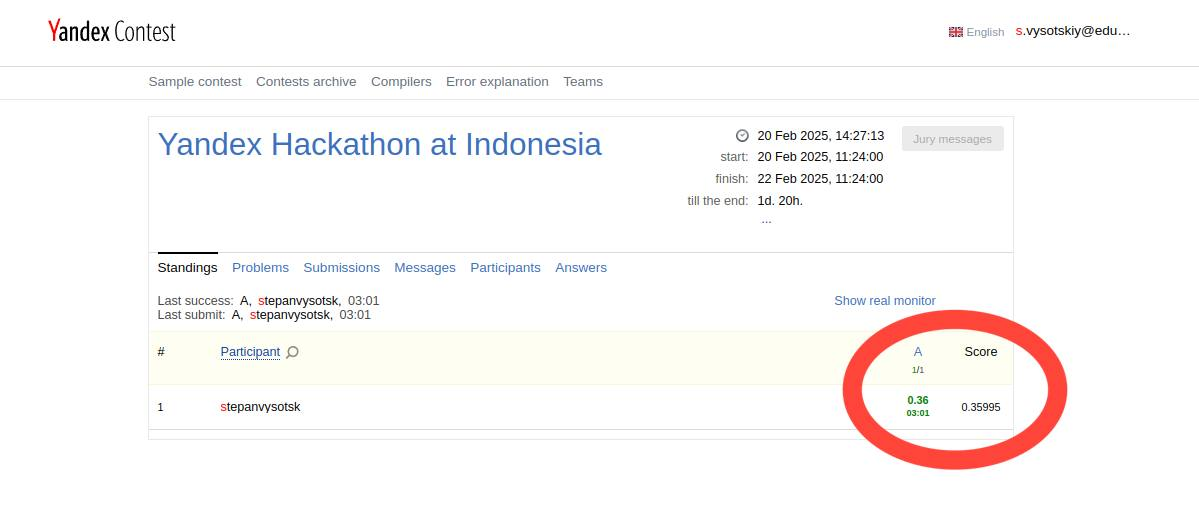

<font color=green><h3><b>**Your works**</b><font>

Your code.

In [ ]:
!pip install catboost
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"  # allows multiple prints from a cell

# install all packages and dependencies so that the code cell runs without errors.

import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os, plotly.express as px, xgboost as xgb, lightgbm, re, tensorflow as tf, tensorflow.keras as keras
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import sklearn.preprocessing # trasnformers
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.neural_network import MLPRegressor  # SKLearn's MLP is optimised for CPU (and doesn't use GPU)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score
# other imports or implementation (for example, Robust Regressor with interpretable match-case statements)

np.set_printoptions(linewidth=10000, precision=2, edgeitems=20, suppress=True)
pd.set_option('display.max_colwidth', 100, 'display.max_columns', 10, 'display.width', 1000, 'display.max_rows', 8)

In [ ]:
train_sample = pd.read_csv('/content/train_sample.csv')
train_sample

,start_point,end_point,time_of_day,day_of_week,traffic_condition,...,population_density,weather,public_transport_availability,historical_delay_factor,travel_time
0,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Sunday,NaN,...,high,NaN,1,0.878909,26.907612
1,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Thursday,NaN,...,high,NaN,1,1.081668,27.489129
2,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),morning,Thursday,NaN,...,low,NaN,2,1.192379,27.228978
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Friday,10.0,...,high,fog,1,0.833348,33.943970
...,...,...,...,...,...,...,...,...,...,...,...
39996,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),morning,Friday,9.0,...,NaN,fog,1,0.914077,55.668274
39997,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),evening,Friday,5.0,...,low,fog,1,0.943298,60.548584
39998,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Thursday,10.0,...,NaN,rain,1,1.185288,23.996753
39999,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),night,Saturday,NaN,...,NaN,rain,2,0.873630,13.841914


In [ ]:
test_sample = pd.read_csv('/content/test_sample.csv')
test_sample

,start_point,end_point,time_of_day,day_of_week,traffic_condition,...,vehicle_density,population_density,weather,public_transport_availability,historical_delay_factor
0,West Jakarta (Jakarta Barat),East Jakarta (Jakarta Timur),morning,Saturday,5.0,...,medium,NaN,NaN,2,1.126429
1,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),evening,Saturday,NaN,...,low,medium,fog,2,1.121015
2,Central Jakarta (Jakarta Pusat),South Jakarta (Jakarta Selatan),morning,Friday,9.0,...,high,NaN,rain,1,1.109638
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),night,Wednesday,5.0,...,low,NaN,storm,1,0.842474
...,...,...,...,...,...,...,...,...,...,...,...
2996,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),day,Monday,NaN,...,high,medium,NaN,2,0.941115
2997,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),day,Saturday,5.0,...,medium,high,fog,2,0.973585
2998,North Jakarta (Jakarta Utara),West Jakarta (Jakarta Barat),day,Tuesday,NaN,...,low,medium,clear,0,0.815122
2999,North Jakarta (Jakarta Utara),West Jakarta (Jakarta Barat),night,Friday,9.0,...,NaN,high,rain,0,0.873886


<font color=green><h3><b>$\alpha$. Preprocessing and EDA</b><h3>

Note there are many omissions, duplicates, outliers, and non-informative features in the dataset, so you need to improve its quality for model training. Below, we highlight some of the problems in the data that may degrade the model quality.</font>

<font color=green>Use graphs to explore the data in detail and find relationships that you can later incorporate into the model. Let’s plot a couple of graphs that may be useful for further model building.</font>


In [ ]:
fill_mode = lambda col: col.fillna(col.mode())
train_sample = train_sample.fillna({k: v[0] for k, v in train_sample.mode().to_dict().items()})
test_sample = test_sample.fillna({k: v[0] for k, v in train_sample.mode().to_dict().items()})

In [ ]:
y_train = train_sample['travel_time']
X_train = train_sample.drop('travel_time', axis=1)
X_test = test_sample

<Figure size 1000x600 with 0 Axes>

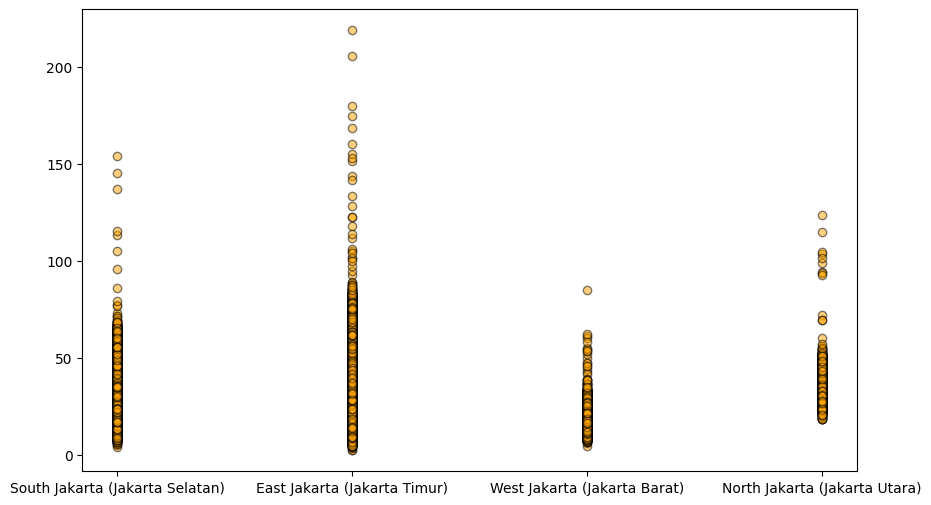

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_sample['end_point'], train_sample['travel_time'], color='orange', alpha=0.5, edgecolors='black')
plt.show()

<Figure size 800x500 with 0 Axes>

(array([ 4010.,     0.,     0.,     0.,     0.,     0.,     0., 11999.,     0.,     0.,     0.,     0.,     0.,     0., 23991.]),
 array([0.  , 0.13, 0.27, 0.4 , 0.53, 0.67, 0.8 , 0.93, 1.07, 1.2 , 1.33, 1.47, 1.6 , 1.73, 1.87, 2.  ]),
 <BarContainer object of 15 artists>)

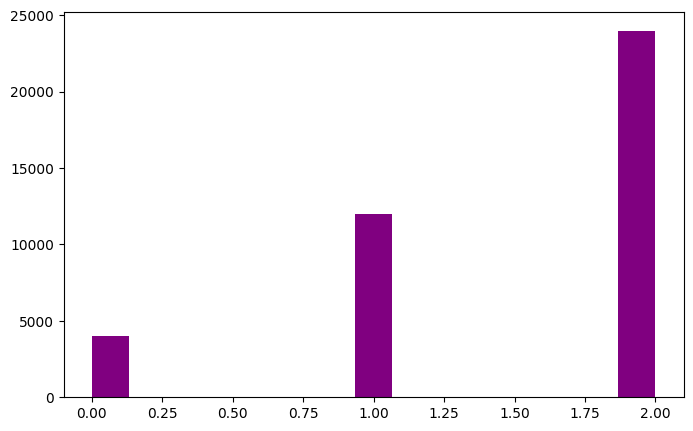

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(train_sample['public_transport_availability'], bins=15, color='purple')
plt.show()

In [ ]:
# Duplicates

# Check for duplicates
duplicates = train_sample.duplicated(keep=False)

# Show duplicate rows
train_sample[duplicates]

,start_point,end_point,time_of_day,day_of_week,traffic_condition,...,population_density,weather,public_transport_availability,historical_delay_factor,travel_time


<Figure size 800x400 with 0 Axes>

<Axes: xlabel='travel_time'>

Text(0.5, 1.0, 'Boxplot of Travel Time')

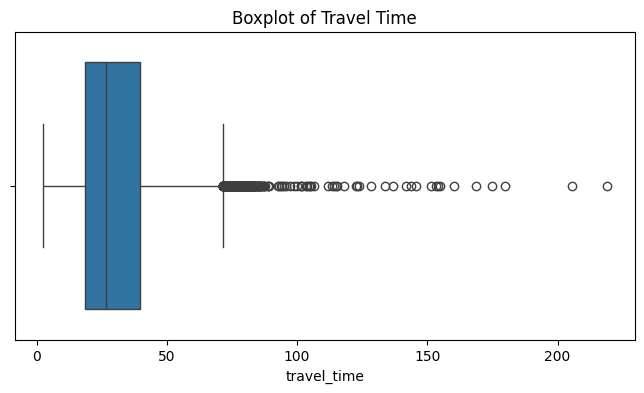

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=train_sample['travel_time'])
plt.title('Boxplot of Travel Time')
plt.show()

<font color=green><H3><b>$\gamma$. Model: fitting regressor </b></H2>
</font>

<font color=green> Now let’s train a CatBoostRegressor model on the data. You can find more about the CatBoost model by Yandex [here](https://catboost.ai/).
</font>


In [ ]:
model = CatBoostRegressor(iterations=300, depth=3, cat_features=list(train_sample.loc[:, (train_sample.dtypes == 'object').values].columns))
model.fit(X_train, y_train)

Learning rate set to 0.195167
0:	learn: 13.0288465	total: 43.7ms	remaining: 13.1s
1:	learn: 11.3771954	total: 85.8ms	remaining: 12.8s
2:	learn: 10.1551757	total: 98.7ms	remaining: 9.77s
3:	learn: 9.1675986	total: 113ms	remaining: 8.35s
4:	learn: 8.4627794	total: 136ms	remaining: 8.01s
5:	learn: 7.8671946	total: 150ms	remaining: 7.33s
6:	learn: 7.4119469	total: 162ms	remaining: 6.8s
7:	learn: 7.0592369	total: 178ms	remaining: 6.49s
8:	learn: 6.8025317	total: 198ms	remaining: 6.39s
9:	learn: 6.4609551	total: 223ms	remaining: 6.47s
10:	learn: 6.1979382	total: 237ms	remaining: 6.24s
11:	learn: 6.0540317	total: 253ms	remaining: 6.07s
12:	learn: 5.9332608	total: 271ms	remaining: 5.99s
13:	learn: 5.8260732	total: 290ms	remaining: 5.93s
14:	learn: 5.7257071	total: 311ms	remaining: 5.9s
15:	learn: 5.6397144	total: 334ms	remaining: 5.94s
16:	learn: 5.5124554	total: 357ms	remaining: 5.95s
17:	learn: 5.4066227	total: 377ms	remaining: 5.91s
18:	learn: 5.3323778	total: 393ms	remaining: 5.81s
19:	lea

<font color=green> Linear Model </font>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Create ColumnTransformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit-transform the train data
X_train_encoded = preprocessor.fit_transform(X_train) # Use X_train directly
X_test_encoded = preprocessor.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ -7.76,  22.37, -19.86,   5.25,  -1.4 ,   6.48,   3.44,  -8.52,  -1.27,   5.02,   2.42,  -6.17,   3.89,  -1.77,   1.61,   1.62,  -1.84,  -1.72,  -1.78,   0.61,  -0.64,   0.04,   0.58,  -0.34,  -0.25,  -0.01,  -0.04,   0.02,   0.04,  -0.  ,   0.  ,   0.  ,  16.04,   5.58])

In [ ]:
lr.intercept_

np.float64(-1.0582445040794717)

<Figure size 800x400 with 0 Axes>

(array([ 37.,  75.,  97., 122., 123., 180., 215., 202., 202., 138., 127., 119., 175., 113., 112., 102.,  99., 100., 123.,  72.,  76.,  94.,  42.,  56.,  41.,  50.,  45.,  28.,  25.,  10.]),
 array([ 5.77,  7.84,  9.9 , 11.97, 14.03, 16.1 , 18.17, 20.23, 22.3 , 24.36, 26.43, 28.49, 30.56, 32.62, 34.69, 36.76, 38.82, 40.89, 42.95, 45.02, 47.08, 49.15, 51.21, 53.28, 55.35, 57.41, 59.48, 61.54, 63.61, 65.67, 67.74]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, '')

Text(0.5, 0, 'Predicted Travel Time')

Text(0, 0.5, '')

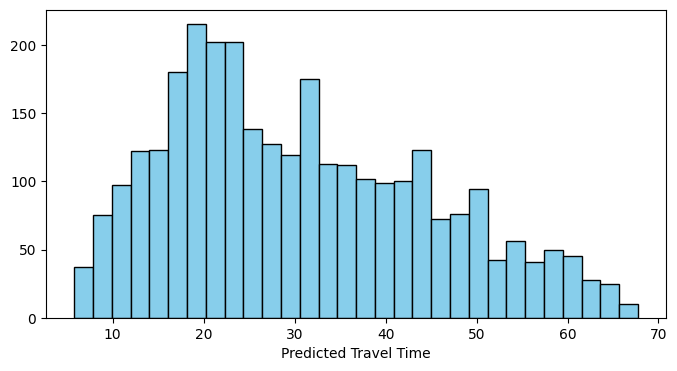

In [ ]:
lr_pred = lr.predict(X_test_encoded)

plt.figure(figsize=(8,4))
plt.hist(lr_pred, bins=30, color='skyblue', edgecolor='black')
plt.title('')
plt.xlabel('Predicted Travel Time')
plt.ylabel('')
plt.show()

<font color='red'> Lasso </fomt>

In [ ]:
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_encoded, y_train)
y_train_pred_lasso = lasso.predict(X_train_encoded)

Lasso(alpha=0.1, max_iter=10000)

<Figure size 800x400 with 0 Axes>

(array([ 91.,  73., 124., 104., 161., 191., 239., 205., 122., 146., 110., 116., 179., 116.,  72., 151.,  64.,  61., 152.,  84.,  29., 107.,  53.,  19.,  51.,  39.,  32.,  65.,  35.,   9.]),
 array([ 8.61, 10.47, 12.34, 14.2 , 16.06, 17.92, 19.78, 21.65, 23.51, 25.37, 27.23, 29.1 , 30.96, 32.82, 34.68, 36.54, 38.41, 40.27, 42.13, 43.99, 45.85, 47.72, 49.58, 51.44, 53.3 , 55.16, 57.03, 58.89, 60.75, 62.61, 64.48]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, '')

Text(0.5, 0, 'Predicted Travel Time')

Text(0, 0.5, '')

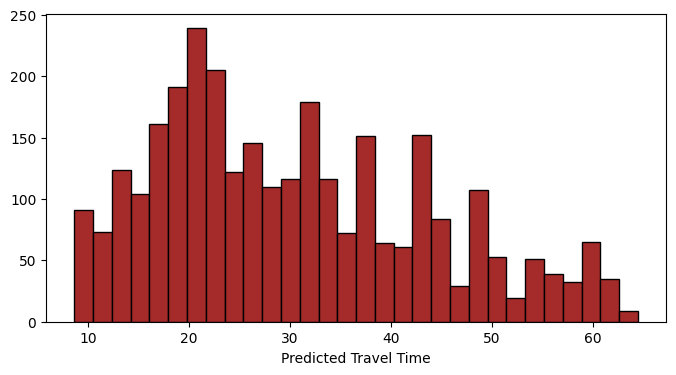

In [ ]:
lasso_pred = lasso.predict(X_test_encoded)

plt.figure(figsize=(8,4))
plt.hist(lasso_pred, bins=30, color='brown', edgecolor='black')
plt.title('')
plt.xlabel('Predicted Travel Time')
plt.ylabel('')
plt.show()

<font color=green><H3><b>$\delta$. Model: evaluation and submit</b></H2>
</font>

<font color=green> Evaluate the model using a selected metric (for example, MSE). Fill in the submission.csv file with the prediction data generated by the model and submit it to the LMS.</font>

In [ ]:
y_train_hat = model.predict(X_train)
mse_lr = mse(y_train_hat, y_train)
r2_lr = r2_score(y_train_hat, y_train)
mse_lr, r2_lr
# also: RMSE will estimate the error on the dataset in the original units

(19.17783070241173, 0.906468530639439)

In [ ]:
# your code here
# Calculate MSE on the training set
mse_lr_train = mse(y_train, y_train_hat)
print(f"Mean Squared Error on Training Set: {mse_lr_train}")

# Calculate RMSE on the training set
rmse_lr_train = np.sqrt(mse_lr_train)
print(f"Root Mean Squared Error on Training Set: {rmse_lr_train}")

# Calculate R-squared on the training set
r2_lr_train = r2_score(y_train, y_train_hat)
print(f"R-squared on Training Set: {r2_lr_train}")

Mean Squared Error on Training Set: 19.17783070241173
Root Mean Squared Error on Training Set: 4.379250015974394
R-squared on Training Set: 0.9156074532997396


In [ ]:
# submission
y_hat_test = model.predict(X_test)
pd.DataFrame(y_hat_test).to_csv('submission.csv', index=False) # save csv-file to root/submission.csv

In [ ]:
# attention! check, this code cell should run without errors
pd.read_csv('submission.csv')['0']

,0
0,49.688392
1,19.057975
2,23.899434
3,21.064379
...,...
2996,23.363449
2997,15.188338
2998,15.343928
2999,14.758059


In [ ]:
r2 = r2_score(y_train, y_train_hat)
print(f"R² Score (Train): {r2}")

R² Score (Train): 0.9156074532997396


# BELOW IS HYPERTUNING CODE

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model.fit(X_tr, y_tr, cat_features=categorical_cols)

val_pred = model.predict(X_val)

from sklearn.metrics import r2_score
r2_val = r2_score(y_val, val_pred)
print(f"Validation R²: {r2_val}")

Learning rate set to 0.188406
0:	learn: 13.1093228	total: 122ms	remaining: 36.5s
1:	learn: 11.5093259	total: 179ms	remaining: 26.6s
2:	learn: 10.2985587	total: 215ms	remaining: 21.3s
3:	learn: 9.3433081	total: 256ms	remaining: 18.9s
4:	learn: 8.6395834	total: 314ms	remaining: 18.5s
5:	learn: 8.0573881	total: 337ms	remaining: 16.5s
6:	learn: 7.4661824	total: 366ms	remaining: 15.3s
7:	learn: 7.0489505	total: 412ms	remaining: 15s
8:	learn: 6.7526744	total: 467ms	remaining: 15.1s
9:	learn: 6.5506086	total: 520ms	remaining: 15.1s
10:	learn: 6.4280966	total: 574ms	remaining: 15.1s
11:	learn: 6.2945127	total: 600ms	remaining: 14.4s
12:	learn: 6.0649228	total: 682ms	remaining: 15.1s
13:	learn: 5.8817236	total: 732ms	remaining: 14.9s
14:	learn: 5.7739759	total: 795ms	remaining: 15.1s
15:	learn: 5.7125972	total: 833ms	remaining: 14.8s
16:	learn: 5.5817955	total: 898ms	remaining: 15s
17:	learn: 5.5235084	total: 961ms	remaining: 15.1s
18:	learn: 5.4689519	total: 1s	remaining: 14.9s
19:	learn: 5.37

Validation R²: 0.9207144707642372


In [ ]:
# submission
y_hat_test = model.predict(X_test)
pd.DataFrame(y_hat_test).to_csv('submission.csv', index=False) # save csv-file to root/submission.csv

In [ ]:
# also: example of preparing zeros submission
# this file preparation is identical to the preparation described above:

# y_hat_test = np.zeros(y_hat_test.shape)
# pd.DataFrame(y_hat_test).to_csv('submission.csv', index=False)

<font color=green>Send the submission file to the LMS.<font color=green>

<font color=green><h3><b>$\epsilon$. References:</b></h3></font>

<font color=green> Remember to cite your sources here! List resources that helped you with ideas and code ([articles/books](https://scholar.google.com/), StackOverflow, Wikipedia, etc.)

<font color=green><b>Student's answer:</b></font>

1. https://www.statology.org/when-to-use-ridge-lasso-regression/
1. https://www.bing.com/search?q=should+i+use+linear+or+lasso&cvid=bef1c5232a60468b97001147ed6c4c7a&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQABhAMgYIAhAAGEAyBggDEAAYQDIGCAQQABhAMgYIBRAAGEAyBggGEAAYQDIGCAcQABhAMgYICBAAGEDSAQg1MzAyajBqOagCCLACAQ&FORM=ANAB01&PC=ACTS

</font>

<font color=green><h3><b>$\zeta$. Documentation: Explain decisions in your process</b></h3></font>

<font color=green><h4><b>Task 1. Explain Decisions in Preprocessing Pipeline</b></h4></font>

<font color=green>
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.</font>

<font color=green>

1. Why did you choose these elements? (Something in EDA, prior experience,...? Note: EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>


<font color=green><b>Student's answer:</b></font>

Handling Missing Values	Filled missing values for each column.
Outlier Check	Used boxplot visualization and IQR method to check for outliers in travel_time.
Distance Feature Engineering seeing the distance between start and end points.
Encoding Used One-Hot Encoding on weather, start_point, end_point, etc.

1. CatBoost allows minimal preprocessing, so I focused on essential steps only.
<br> Feature Relevance: Based on travel prediction, distance is always critical.
<br> Model Compatibility: Different models require different preprocessing:
<br>CatBoost: No encoding, no scaling
<br>Linear / Lasso: Need One-Hot Encoding

2. Missing Values Handling Checked that models ran without errors,<br>
Distance Feature Verified that distance correlated well with travel_time, <br>
Outlier Decision Plotted data; since there weren’t extreme outliers, keeping all data improved model robustness, <br>
Encoding worked correctly and models ran successfully.

3. Scaling Data	Not needed for CatBoost or tree models. For linear models, results were similar without scaling because features were mostly binary or distance.

<font color=green><h4><b>Task 2. Explain Decisions in Modeling Pipeline</b></h4></font>

<font color=green>
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>

<font color=green><b>Student's answer:</b></font>

The task is to predict car trip duration in Jakarta based on route, traffic, and weather data.

Data Cleaning & Missing Values = used to fill missing values
EDA & Outliers = Used boxplots to detect outliers.
Weather Encoding For linear models = I used One-Hot Encoding to make it numerical.
and also i Tried Linear Regression and Lasso Regression to helps understand whether simple models can perform well or if tree models are needed.

1. Adding distance made the model more grounded in real-world logic, and also Minimal preprocessing for CatBoost kept the pipeline simple and reproducible.

2. Checked MSE, RMSE, R² on train set. and do Model Comparison between CatBoost, Linear and Lasso on the same dataset. CatBoost outperformed others, confirming non-linearity.

3. Tried: Linear Regression, Lasso Regression, Outlier Removal, Weather Encoding. all of them worked well for me.

# 💡**Starter Ideas**

1. **Preproccesing**: thoroughly preprocess the data, removing duplicates and filling in the omissions with more complex rules (for example, use the mode for each feature).
2. **EDA**: explore the distribution of the object features, remove outliers, and carefully examine the target variable. Exploratory data analysis may yield more important insights than any machine learning model, because your findings have will have one invaluable quality — interpretability. You may want take a closer look at the discrete distributions of categorical features, as well as the number of unique feature values and how informative the variable is. Examine shifts in variable values, including in different datasets (training and test).
2. **Robust algorithms and interpretability**: Check the test dataset for shifts and the retention of dependencies learned by the model. To assess the model’s representativeness, use a holdout dataset. You might want to train more robust models that will deliver high quality regardless of dataset shifts. For example, you may try to thoroughly analyze the data and describe the target variable with decision algorithms (match-case statement, if-else).
3. **Hypotheses**: We recommend formulating your own hypotheses regarding the factors that influence the travel time. For example, you may use the data to derive the lower estimate for the trip duration that captures most of the true dependencies.
4. **Data**: The use of additional data for solving the problem is allowed if this helps to understand the nature of the data provided. One example of useful features may include data on districts and routes in Jakarta.
3. **Tuning model, validation set**: for the final stage, a model is usually evaluated on a validation set rather than on a training dataset. A part of the training dataset is put aside for the validation set, and the model is trained on the remaining data. Validation sets are also useful for tuning hyperparameters (for example, using cross-validation) for optimal model performance.
4. **Other linear (and non-linear) models**: Try out different approaches to linear models (Ridge, Lasso, SGDRegressor, MLPRegressor).
8. **Ensemble**: Use ensemble learning and apply various averaging methods (Voting Classifier, Bagging, Boosting).
